In [3]:
%load_ext autoreload
%autoreload 1
%aimport color_classifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



In [4]:
from ultralytics import YOLO
coco_model = YOLO('./models/yolov8n.pt')
vehicles = [2, 3, 5, 7]
print([coco_model.names[vehicle] for vehicle in vehicles])

['car', 'motorcycle', 'bus', 'truck']


In [24]:
from YOLO_detector import YoloDetector
from main import VideoRunner
from color_classifier import ColorClassifier

car_detector = YoloDetector(coco_model, vehicles, draw=False).detect

labels = ['black', 'blue', 'brown', 'green', 'pink', 'red', 'silver', 'white', 'yellow']
color_classifier = ColorClassifier(car_detector, 'models/color_model_5.keras', labels)

video_runner = VideoRunner("data/highway/static_front.mp4", color_classifier.predict)

In [ ]:
video_runner.run()

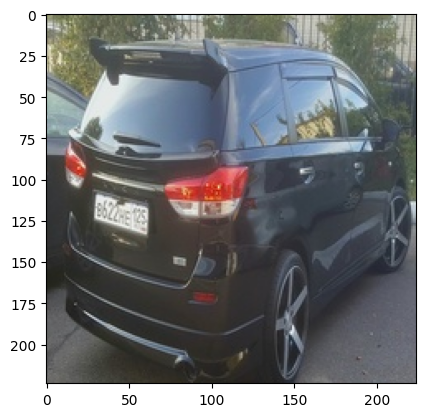

1/1 [==============================] - 1s 1s/step
[[          0           0           0           0           0           0           0           1           0]]
white


In [37]:
from keras.models import load_model
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/color_classification/train/black/_IAAAgGVeOA-19203.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img = cv2.resize(img, (224, 224))


img = np.expand_dims(img, axis=0)

model = load_model('models/color_model_5.keras')
color_scores = model.predict(img)
print(color_scores)
print(labels[np.argmax(color_scores)])